In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

from glob import glob # glob is a fun for merging multiple files 

### Load data

In [2]:
# the word 'sales' is first part of file name
files = glob("D:\M48\Dataset-EDA\dataset_oct_23/sales*")  # path external folder
files

['D:\\M48\\Dataset-EDA\\dataset_oct_23\\sales_trader_oct_23_cable.xlsx',
 'D:\\M48\\Dataset-EDA\\dataset_oct_23\\sales_trader_oct_23_fan.xlsx',
 'D:\\M48\\Dataset-EDA\\dataset_oct_23\\sales_trader_oct_23_se.xlsx']

##### Load Data - Additional

In [3]:
sc = pd.read_excel("D://M48//Dataset-EDA//trader_month_sales//outlet.xlsx") # here double forward slash works
tds = pd.read_excel("D://M48//Dataset-EDA//trader_month_sales//traders.xlsx") # use double forward slash for OSError

In [4]:
tds.head()

,client_id,client_name,party_type,address,sp_id
0,9H5M3DAKHEHEHE5M,A J Electric (Vadail),Trader,"School Road,Vadail.",3519
1,9H5M3DAKHEHE7O5M,Afroz Electric,Trader,"Chowdhury Market, Chowrasta, Ashulia, Dhaka.",3519
2,9H5M3DAKHEHE3D9H,Afsana Enterprise,Trader,"Landmark,Ashulia",3519
3,9H5M3DAKHEHE3D2P,Akhi Electric,Trader,"Super Market,Ashulia Bazar,Ashulia.",3519
4,9H5M3DAKHEHE1L7O,Al Modina Electric,Trader,"Katal Bagan,Polash Bare,Ashulia",3519


In [5]:
# # Filter/ checking branch
# sc[sc['Branch_name']=='Uttara Sales Center']

### Managing Multiples Files

In [6]:
files.sort() # File sorting
files

['D:\\M48\\Dataset-EDA\\dataset_oct_23\\sales_trader_oct_23_cable.xlsx',
 'D:\\M48\\Dataset-EDA\\dataset_oct_23\\sales_trader_oct_23_fan.xlsx',
 'D:\\M48\\Dataset-EDA\\dataset_oct_23\\sales_trader_oct_23_se.xlsx']

In [7]:
# Concat all in a single file
df_org = pd.concat((pd.read_excel(file) for file in files), ignore_index=True) 
df_org.head()

,SL.,Trader's Name,Party Type,Trader's Address,Outstanding,Sales (BDT.),Sales Return (BDT.),Collection (BDT.),Current Outstanding(BDT.),Branch_name,product_id,date
0,12,Arif Electric House,Traders,"Fozor Ali Market,Baroipara,Ashulia.",142616.87,57447.28,0.0,0.0,200064.15,Ashulia Sales Center,10,2023-10-31
1,16,Bekash Electric & Electronics (Akter),Traders,"South Gazirchat, Ashulia",205542.45,182655.44,0.0,75000.0,313197.89,Ashulia Sales Center,10,2023-10-31
2,17,Bhai Bhai Electric Sales & Service (Jamgora),Traders,"Chowdhury Market,Chowrasta,Jamgora,Ashulia.",523425.24,140521.72,0.0,140522.0,523424.96,Ashulia Sales Center,10,2023-10-31
3,20,Chandpur Electric Service (Jamgora),Traders,"Chowrasta,Jamgora,Ashulia.",-18640.95,423430.21,0.0,405354.0,-564.74,Ashulia Sales Center,10,2023-10-31
4,21,Chandpur Electric(Polashbari),Traders,"Bot tola Road,Polashbari.",-64.72,981224.44,0.0,807489.0,173670.72,Ashulia Sales Center,10,2023-10-31


In [8]:
df_org.shape

(1651, 12)

In [9]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SL.                        1651 non-null   int64         
 1   Trader's Name              1651 non-null   object        
 2   Party Type                 1651 non-null   object        
 3   Trader's Address           1649 non-null   object        
 4   Outstanding                1651 non-null   float64       
 5   Sales (BDT.)               1651 non-null   float64       
 6   Sales Return (BDT.)        1651 non-null   float64       
 7   Collection (BDT.)          1651 non-null   float64       
 8   Current Outstanding(BDT.)  1651 non-null   float64       
 9   Branch_name                1647 non-null   object        
 10  product_id                 1651 non-null   int64         
 11  date                       1651 non-null   datetime64[ns]
dtypes: dat

### Check EDA factors

- <b> Taks: </b>
- pid coversion (float to int)
- drop sl
- need to bring SC id from table sc, so merge (like Vlookup) it, since no need merge all col only sc_id, so col must be same 
- Need to see milling values & fill it (Uttara Sales Center)
- Concate ( client name + Center ID) >> trd table & df_org table, then need to check what are new clients by merging rule
- Sales - Return = Actual Sales finding
- Duplication (SC wise duplication) finding

In [10]:
sc.rename(columns={'center_fullname':'Branch_name'}, inplace=True)
sc

,center_id,Branch_name,sales_points,div2_code,division2
0,1001,Comilla Sales Center,Comilla,11,Comilla
1,1003,Feni Sales Center,Feni,11,Comilla
2,2666,Chowmuhani Sales Center,Chowmuhani,11,Comilla
3,2772,Hajigonj Sales Center,Hajigonj,11,Comilla
4,3418,Laksham Sales Center,Laksham,11,Comilla
...,...,...,...,...,...
60,7529,Tongi Sales Center,Tongi,10,Dhaka - South
61,7528,Magura Sales Center,Magura,13,Jessore
62,7527,Lalmonirhat Sales Center,Lalmonirhat,18,Bogra
63,7530,Manikganj Sales Center,Manikganj,15,Dhaka - North


In [11]:
sc.head()

,center_id,Branch_name,sales_points,div2_code,division2
0,1001,Comilla Sales Center,Comilla,11,Comilla
1,1003,Feni Sales Center,Feni,11,Comilla
2,2666,Chowmuhani Sales Center,Chowmuhani,11,Comilla
3,2772,Hajigonj Sales Center,Hajigonj,11,Comilla
4,3418,Laksham Sales Center,Laksham,11,Comilla


In [12]:
# Getting SC_ID by merge/vlookup
df_1 = pd.merge(df_org, sc[['Branch_name','center_id',]], on='Branch_name')
df_1.head()

,SL.,Trader's Name,Party Type,Trader's Address,Outstanding,Sales (BDT.),Sales Return (BDT.),Collection (BDT.),Current Outstanding(BDT.),Branch_name,product_id,date,center_id
0,12,Arif Electric House,Traders,"Fozor Ali Market,Baroipara,Ashulia.",142616.87,57447.28,0.0,0.0,200064.15,Ashulia Sales Center,10,2023-10-31,3519
1,16,Bekash Electric & Electronics (Akter),Traders,"South Gazirchat, Ashulia",205542.45,182655.44,0.0,75000.0,313197.89,Ashulia Sales Center,10,2023-10-31,3519
2,17,Bhai Bhai Electric Sales & Service (Jamgora),Traders,"Chowdhury Market,Chowrasta,Jamgora,Ashulia.",523425.24,140521.72,0.0,140522.0,523424.96,Ashulia Sales Center,10,2023-10-31,3519
3,20,Chandpur Electric Service (Jamgora),Traders,"Chowrasta,Jamgora,Ashulia.",-18640.95,423430.21,0.0,405354.0,-564.74,Ashulia Sales Center,10,2023-10-31,3519
4,21,Chandpur Electric(Polashbari),Traders,"Bot tola Road,Polashbari.",-64.72,981224.44,0.0,807489.0,173670.72,Ashulia Sales Center,10,2023-10-31,3519


In [13]:
df_1.shape

(1647, 13)

In [14]:
# Missing value imputation - 4 branches 
df_org['Branch_name'].fillna('Uttara Sales Center', inplace=True)

In [15]:
df_org.shape

(1651, 12)

- Merged/ lookup ok, but missed 4, lets try with how, df_org in left, so "how=left" will work

In [16]:
# syntax: pd.merge(tabl1, table2[['col_name(common) by which need to join','col_name(s) you want',]], on='col(matched)', how=)
df_2 = pd.merge(df_org, sc[['Branch_name','center_id',]], on='Branch_name', how='left')
df_2.head()

,SL.,Trader's Name,Party Type,Trader's Address,Outstanding,Sales (BDT.),Sales Return (BDT.),Collection (BDT.),Current Outstanding(BDT.),Branch_name,product_id,date,center_id
0,12,Arif Electric House,Traders,"Fozor Ali Market,Baroipara,Ashulia.",142616.87,57447.28,0.0,0.0,200064.15,Ashulia Sales Center,10,2023-10-31,3519
1,16,Bekash Electric & Electronics (Akter),Traders,"South Gazirchat, Ashulia",205542.45,182655.44,0.0,75000.0,313197.89,Ashulia Sales Center,10,2023-10-31,3519
2,17,Bhai Bhai Electric Sales & Service (Jamgora),Traders,"Chowdhury Market,Chowrasta,Jamgora,Ashulia.",523425.24,140521.72,0.0,140522.0,523424.96,Ashulia Sales Center,10,2023-10-31,3519
3,20,Chandpur Electric Service (Jamgora),Traders,"Chowrasta,Jamgora,Ashulia.",-18640.95,423430.21,0.0,405354.0,-564.74,Ashulia Sales Center,10,2023-10-31,3519
4,21,Chandpur Electric(Polashbari),Traders,"Bot tola Road,Polashbari.",-64.72,981224.44,0.0,807489.0,173670.72,Ashulia Sales Center,10,2023-10-31,3519


In [17]:
df_2.shape

(1651, 13)

In [18]:
df_2.tail()

,SL.,Trader's Name,Party Type,Trader's Address,Outstanding,Sales (BDT.),Sales Return (BDT.),Collection (BDT.),Current Outstanding(BDT.),Branch_name,product_id,date,center_id
1646,59,Oshi Electric & Electronics,Traders,"Dariapur,Narail",0.00,8510.84,0.0,8512.0,-1.16,Narail Sales Center,15,2023-10-31,3647
1647,58,Sohag Electric & Solar House,Traders,"Nazirpur Bazar, Gurudaspur, Natore.",0.00,13629.42,0.0,13630.0,-0.58,Natore Sales Center,15,2023-10-31,4151
1648,80,Rubel Electric,Traders,"Chollisha bazar, Netrokona shador, Netrokona",-2.55,12296.00,0.0,12296.0,-2.55,Netrokona Sales Center,15,2023-10-31,3632
1649,63,Counter sale,Traders,SQ,0.00,194648.61,0.0,194650.0,-1.39,Savar Sales Center,15,2023-10-31,1009
1650,129,Nurjahan Trading,Traders,"101 Al Falaha Complex,Lalbazar Sylhet",0.00,16898.88,0.0,16899.0,-0.12,Sylhet Sales Center,15,2023-10-31,2191


In [19]:
df_2['center_id'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1646    False
1647    False
1648    False
1649    False
1650    False
Name: center_id, Length: 1651, dtype: bool

In [20]:
df_2['Branch_name'].value_counts()

Kishoregonj Sales Center    77
Mymensing Sales Center      62
Gazipur Sales Center        61
Pabna Sales Center          54
Comilla Sales Center        54
                            ..
Saidpur Sales Center         9
Manikganj Sales Center       9
Joypurhat Sales Center       8
Lalmonirhat Sales Center     8
Tongi Sales Center           5
Name: Branch_name, Length: 65, dtype: int64

In [21]:
df_2['product_id'].value_counts()

10    1404
14     202
15      45
Name: product_id, dtype: int64

In [22]:
# works only numerial datatypes
df_2.corr()

,SL.,Outstanding,Sales (BDT.),Sales Return (BDT.),Collection (BDT.),Current Outstanding(BDT.),product_id,center_id
SL.,1.000000,-0.011032,-0.009556,-0.019108,-0.006733,-0.012590,-0.214332,-0.239599
Outstanding,-0.011032,1.000000,0.281875,0.058698,0.319962,0.963051,-0.099577,-0.096926
Sales (BDT.),-0.009556,0.281875,1.000000,0.061006,0.904561,0.406949,0.037622,-0.065000
Sales Return (BDT.),-0.019108,0.058698,0.061006,1.000000,0.046403,0.050623,-0.015631,-0.004199
Collection (BDT.),-0.006733,0.319962,0.904561,0.046403,1.000000,0.331799,0.014010,-0.048316
Current Outstanding(BDT.),-0.012590,0.963051,0.406949,0.050623,0.331799,1.000000,-0.079321,-0.107676
product_id,-0.214332,-0.099577,0.037622,-0.015631,0.014010,-0.079321,1.000000,0.056973
center_id,-0.239599,-0.096926,-0.065000,-0.004199,-0.048316,-0.107676,0.056973,1.000000


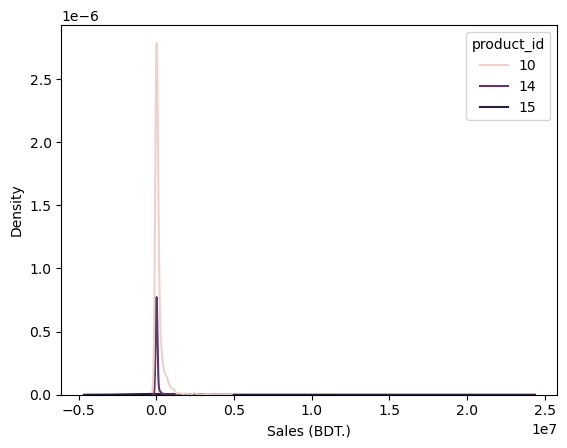

In [23]:
sns.kdeplot(data=df_2, x='Sales (BDT.)', hue='product_id')
plt.show()

## Filtering Product data

In [24]:
# Filter- Multiple
cab_se = df_2[df_2['product_id'].isin([10,15])]  
cab_se.head()

,SL.,Trader's Name,Party Type,Trader's Address,Outstanding,Sales (BDT.),Sales Return (BDT.),Collection (BDT.),Current Outstanding(BDT.),Branch_name,product_id,date,center_id
0,12,Arif Electric House,Traders,"Fozor Ali Market,Baroipara,Ashulia.",142616.87,57447.28,0.0,0.0,200064.15,Ashulia Sales Center,10,2023-10-31,3519
1,16,Bekash Electric & Electronics (Akter),Traders,"South Gazirchat, Ashulia",205542.45,182655.44,0.0,75000.0,313197.89,Ashulia Sales Center,10,2023-10-31,3519
2,17,Bhai Bhai Electric Sales & Service (Jamgora),Traders,"Chowdhury Market,Chowrasta,Jamgora,Ashulia.",523425.24,140521.72,0.0,140522.0,523424.96,Ashulia Sales Center,10,2023-10-31,3519
3,20,Chandpur Electric Service (Jamgora),Traders,"Chowrasta,Jamgora,Ashulia.",-18640.95,423430.21,0.0,405354.0,-564.74,Ashulia Sales Center,10,2023-10-31,3519
4,21,Chandpur Electric(Polashbari),Traders,"Bot tola Road,Polashbari.",-64.72,981224.44,0.0,807489.0,173670.72,Ashulia Sales Center,10,2023-10-31,3519


In [25]:
cab_se.shape

(1449, 13)

In [26]:
# Fiter - Single e.g Cable
cable = df_2[df_2['product_id'].isin([10])]
cable.head()

,SL.,Trader's Name,Party Type,Trader's Address,Outstanding,Sales (BDT.),Sales Return (BDT.),Collection (BDT.),Current Outstanding(BDT.),Branch_name,product_id,date,center_id
0,12,Arif Electric House,Traders,"Fozor Ali Market,Baroipara,Ashulia.",142616.87,57447.28,0.0,0.0,200064.15,Ashulia Sales Center,10,2023-10-31,3519
1,16,Bekash Electric & Electronics (Akter),Traders,"South Gazirchat, Ashulia",205542.45,182655.44,0.0,75000.0,313197.89,Ashulia Sales Center,10,2023-10-31,3519
2,17,Bhai Bhai Electric Sales & Service (Jamgora),Traders,"Chowdhury Market,Chowrasta,Jamgora,Ashulia.",523425.24,140521.72,0.0,140522.0,523424.96,Ashulia Sales Center,10,2023-10-31,3519
3,20,Chandpur Electric Service (Jamgora),Traders,"Chowrasta,Jamgora,Ashulia.",-18640.95,423430.21,0.0,405354.0,-564.74,Ashulia Sales Center,10,2023-10-31,3519
4,21,Chandpur Electric(Polashbari),Traders,"Bot tola Road,Polashbari.",-64.72,981224.44,0.0,807489.0,173670.72,Ashulia Sales Center,10,2023-10-31,3519


In [27]:
cable.shape

(1404, 13)

### Subplots

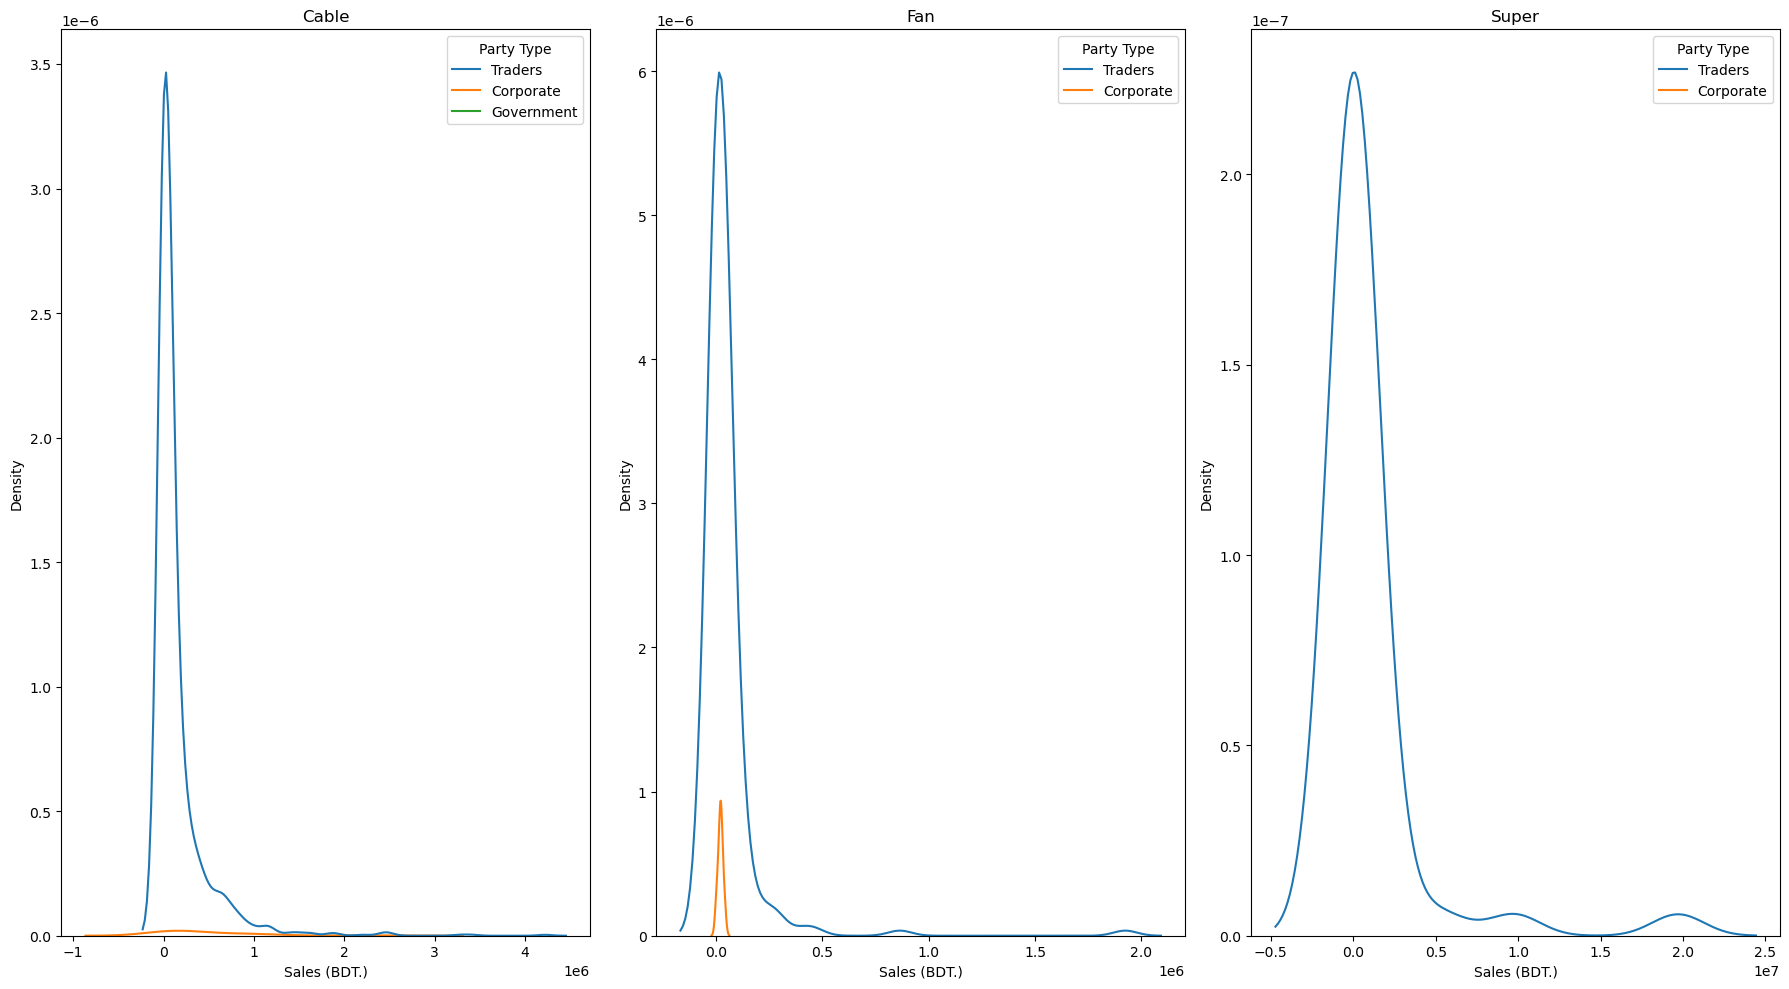

In [28]:
# plot Architecture
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,10))

# Title
ax1.set_title('Cable')
ax2.set_title('Fan')
ax3.set_title('Super')

# ploling
sns.kdeplot(data=df_2[df_2['product_id']==10], x='Sales (BDT.)', hue='Party Type', ax=ax1)
sns.kdeplot(data=df_2[df_2['product_id']==14], x='Sales (BDT.)', hue='Party Type', ax=ax2)
sns.kdeplot(data=df_2[df_2['product_id']==15], x='Sales (BDT.)', hue='Party Type', ax=ax3)

# Display
plt.tight_layout()
plt.show()

<b> Tasks </b>
- Once data diviion mapped then need to practice suplots by loop ref(TSA-D&F)

#### Type Conversion / Correction

### Duplication Check

In [29]:
cable.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1399    False
1400    False
1401    False
1402    False
1403    False
Length: 1404, dtype: bool

In [30]:
cable.duplicated().value_counts()

False    1404
dtype: int64

<b> Tasks </b>
- Need to Check duplicate values & numbers
- By outlet duplicate values

In [32]:
# Rerturn bolen wether there is duplicate in traders_name
df_org.duplicated(subset=["Trader's Name"])

0       False
1       False
2       False
3       False
4       False
        ...  
1646    False
1647     True
1648    False
1649     True
1650     True
Length: 1651, dtype: bool

In [33]:
# Checking total number of duplicate values
df_org.duplicated(subset=["Trader's Name"]).sum()

229

In [34]:
# Checking duplicate values (trader name) by Branch Name
df_org.duplicated(subset=["Trader's Name",'Branch_name']).sum()

132

In [41]:
# See the duplicated values (details) by branch
test = df_org.loc[df_org.duplicated(subset=["Trader's Name",'Branch_name'])]
test

,SL.,Trader's Name,Party Type,Trader's Address,Outstanding,Sales (BDT.),Sales Return (BDT.),Collection (BDT.),Current Outstanding(BDT.),Branch_name,product_id,date
1404,115,M/S Arafat Enterprise,Traders,"Badher Upor, Near Islami Bank, Muladi, Barishal",-0.40,2881.00,0.0,2881.0,-0.40,Barisal Sales Center,14,2023-10-31
1405,212,Nannu Electric,Traders,"Mirgonj,Babugonj.",-0.80,5762.00,0.0,5762.0,-0.80,Barisal Sales Center,14,2023-10-31
1406,229,Peal Electric,Traders,"High School Road,Nalchity,",0.00,8643.00,0.0,8643.0,0.00,Barisal Sales Center,14,2023-10-31
1407,244,RRF Electric,Traders,"Rahmatpur, Airport, Babugonj, Barisal.",-0.32,3053.00,0.0,3053.0,-0.32,Barisal Sales Center,14,2023-10-31
1410,281,Takiya Battery House,Traders,"West Kawnia Natun Bazar Pool, Barishal.",0.00,2881.00,0.0,2881.0,0.00,Barisal Sales Center,14,2023-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...
1640,22,Miraj Electric,Traders,"College Road, Langolbad, Magura",0.00,12246.40,0.0,12250.0,-3.60,Magura Sales Center,15,2023-10-31
1641,29,Square Electric,Traders,"Jhenaidah Highway Road, Magura",-1.20,51995.41,0.0,51997.0,-2.79,Magura Sales Center,15,2023-10-31
1645,33,Jerin Electric (LH),Traders,"Molla Shopping Complex, Lohagara, Narail",0.00,6087.96,0.0,6088.0,-0.04,Narail Sales Center,15,2023-10-31
1647,58,Sohag Electric & Solar House,Traders,"Nazirpur Bazar, Gurudaspur, Natore.",0.00,13629.42,0.0,13630.0,-0.58,Natore Sales Center,15,2023-10-31


In [45]:
test.sort_values(by=["Branch_name"], ascending=True)

,SL.,Trader's Name,Party Type,Trader's Address,Outstanding,Sales (BDT.),Sales Return (BDT.),Collection (BDT.),Current Outstanding(BDT.),Branch_name,product_id,date
1404,115,M/S Arafat Enterprise,Traders,"Badher Upor, Near Islami Bank, Muladi, Barishal",-0.40,2881.0,0.0,2881.0,-0.40,Barisal Sales Center,14,2023-10-31
1405,212,Nannu Electric,Traders,"Mirgonj,Babugonj.",-0.80,5762.0,0.0,5762.0,-0.80,Barisal Sales Center,14,2023-10-31
1406,229,Peal Electric,Traders,"High School Road,Nalchity,",0.00,8643.0,0.0,8643.0,0.00,Barisal Sales Center,14,2023-10-31
1407,244,RRF Electric,Traders,"Rahmatpur, Airport, Babugonj, Barisal.",-0.32,3053.0,0.0,3053.0,-0.32,Barisal Sales Center,14,2023-10-31
1410,281,Takiya Battery House,Traders,"West Kawnia Natun Bazar Pool, Barishal.",0.00,2881.0,0.0,2881.0,0.00,Barisal Sales Center,14,2023-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...
1599,53,Palong Electric,Traders,"Valukia Road , Court bazar , Ukhiya , Cox,s bazar",-16.00,32923.8,0.0,32924.0,-16.20,Teknaf Sales Center,14,2023-10-31
1598,36,M/S Al Modina Electric House,Traders,"Sea Beach Road ,Alia bad ,Teknaf",-1.20,117049.8,0.0,117051.0,-2.40,Teknaf Sales Center,14,2023-10-31
1601,4,Counter Sales,Corporate,Asraf Shetu Shopping Complex,0.00,23048.0,0.0,23048.0,0.00,Tongi Sales Center,14,2023-10-31
1604,120,New Chandu Electric,Traders,"Shop-no-12, Cosmo Shopping Complex, Uttara, Dhaka",0.00,8191.5,0.0,8192.0,-0.50,Uttara Sales Center,14,2023-10-31


In [42]:
# Value counts by branch (duplicated)
test_1 = df_org.loc[df_org.duplicated(subset=["Trader's Name",'Branch_name'])].Branch_name.value_counts()
test_1

Chowmuhani Sales Center         7
Pabna Sales Center              6
Lakshmipur Sales Center         6
Kurigram Sales Center           6
Barisal Sales Center            5
Jamalpur Sales Center           5
Mymensing Sales Center          5
Khulna Sales Center             5
Magura Sales Center             5
Comilla Sales Center            4
Rangpur Sales Center            4
Sitakundo Sales Center          4
Kustia Sales Center             4
Faridpur Sales Center           3
Narail Sales Center             3
Brahmanbaria Sales Center       3
Sherpur Sales Center            3
Feni Sales Center               3
Keranihat Sales Center          3
Jessore Sales Center            3
Hajigonj Sales Center           3
Tangail Sales Center            2
Natore Sales Center             2
Teknaf Sales Center             2
Sunamganj Sales Center          2
Uttara Sales Center             2
Gazipur Sales Center            2
Laksham Sales Center            2
Bogra Sales Center              2
Sylhet Sales C

In [39]:
len(test)

49

In [40]:
test.shape

(49,)